# **Primeros pasos con Google Earth Engine**

Una vez estudiado este cuaderno el alumno aprenderá como configurar la API Earth Engine Python en un cuaderno de trabajo Google Colab y como mostrar el resultado de algunos procesos realizados en GEE. En posteriores cuadernos se estudiará con mayor profundidad el uso de imágenes y colecciones de imágenes y el potencial uso que presentan en agricultura.




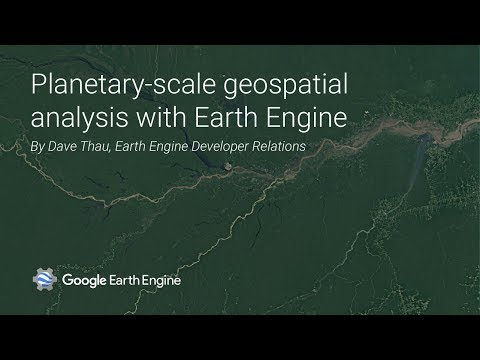

In [1]:
#@markdown Antes de empezar... en este vídeo de 3 minutos Dave Thau presenta que es el proyecto Google Earh Engine
from IPython.display import YouTubeVideo
YouTubeVideo('4E6yQLoGO2o', width=600, height=400)

En todos los desarrollos que hagamos a partir de ahora deberemos importar, como mínimo, la librería de Earth Engine, y posteriormente identificarnos e iniciarla. Para ello, previamente deberemos estar dados de alta en GEE para usar este servicio, realizándolo a través de un usuario de Google.

## Paso 1.- Importar la API y obtener las credenciales
La API de Earth Engine aparece instalada por defecto en  Google Colaboratory, por tanto solo necesitaremos importarla y luego identificarnos. 

**Estos pasos será necesario realizarlos siempre que iniciemos una sesión en Colab y deseemos trabajar con GEE**

<p><iframe src="https://www.youtube.com/embed/4E6yQLoGO2o" width="560" height="315" frameborder="0" allowfullscreen="allowfullscreen"></iframe></p>





In [2]:
import ee

#### **1.1. Identificación e inicialización**

Una vez importada la libreria será necesario identificarnos como usuario e inicializar el servicio.

Si el usuario no esta dado de alta en el servicio, deberá realizarlo empleando su usuario de Google a través de este [link](https://accounts.google.com/ServiceLogin/signinchooser?service=ah&passive=true&continue=https%3A%2F%2Fappengine.google.com%2F_ah%2Fconflogin%3Fcontinue%3Dhttps%3A%2F%2Fsignup.earthengine.google.com%2F&flowName=GlifWebSignIn&flowEntry=ServiceLogin) y seguir los pasos indicados.

Las dos siguientes lineas de código permiten identificar e inicializar el servicio: 
1. ee.Authenticate: El usuario se identifica con esta función para acceder al servicio de Earth Engine
2.   ee.Initialize: Función para iniciar el servicio.

A la hora de inicializar Earth Engine aparecerá una URL para abrir en un navegador. Siguiendo las instrucciones, el usuario obtendrá un código de acceso a introducir en la entrada generada En el cuaderno.
Si todo se ha realizado correctamente se obtendrá el mensaje "*Successfully saved authorization token*".

Esta operación es necesario realizarla en cada sesión.



In [3]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=OY57-nsH2TVib97HyaXpoH4ZniihguNsS7CP5RlLkA0&tc=oJHt-ShCb16lplQt4OfmyNDnoIfwF7dFqjrPQS-5jJo&cc=OenmeJo1UWCd30G9NPSUGh1Va7SdStStq5PjKZGcWQU

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AVHEtk6UxMts8hNXqa529h5SGX7vh8goLTQIWoOejvgcOz9CSs9JSnArRFM

Successfully saved authorization token.


*  **Comprobación del correcto funcionamiento de la API**

En el siguiente ejemplo se accede a un Modelo Digital de Elevaciones y se solicita que  devuelva la elevación de un punto. Si todo es correcto devolverá el valor solicitado.

El objetivo de esta llamada es solo verificar que todo funciona correctamente.

In [4]:
# Imprimir la cota del monte Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


## **Paso 2.- Visualización de mapas**
Las salidas de GEE a modo de mapas / imágenes puede realizarse bien a través de imágenes estáticas o bien a través de mapas interactivos.

### **2.1 Imágenes estáticas**
Para ello se empleará la función **Image** dentro del módulo Ipython.display.
El siguiente ejemplo representa en pantalla un DEM en pantalla. 

In [5]:
# Import libraries.
# import ee #Descomentar si se lanza el cuaderno por primera vez en la sesión
from IPython.display import Image

# Trigger the authentication flow.
# ee.Authenticate() #Descomentar si se lanza el cuaderno por primera vez en la sesión

# Import a DEM and display a thumbnail of it.
#dem = ee.Image('USGS/SRTMGL1_003')
Image(url=dem.updateMask(dem.gt(0))
  .getThumbUrl({'min': 0, 'max': 4000, 'dimensions': 1024,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

### **2.2 Mapas interactivos**

Se empleará el paquete **[folium](https://python-visualization.github.io/folium/)** sobre un mapa interactivo empleando **[Leaflet](https://leafletjs.com)**.


In [ ]:

# Import libreria Folium
import folium
from folium import plugins

# Add custom basemaps to folium
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    )
}

# Definición de un método para representar imágenes Earth Engine en un objeto folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Añade un método de dibujo en folium.
folium.Map.add_ee_layer = add_ee_layer

# Definición de parámetros de visualizacion.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Creación de un objeto de tipo folium map
mi_mapa = folium.Map(location=[36, -3], zoom_start=10, height=500)

# Añadimos mapas base al visor
basemaps['Google Maps'].add_to(mi_mapa)
basemaps['Google Satellite Hybrid'].add_to(mi_mapa)
basemaps['Google Terrain'].add_to(mi_mapa)
basemaps['Esri Satellite'].add_to(mi_mapa)


# Añade un DEM al objeto mapa.
mi_mapa.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'Modelo digital')

# Añade un panel de control de capas en el mapa.
mi_mapa.add_child(folium.LayerControl())

#Añade un pluging para mostrar la información en pantalla completa
plugins.Fullscreen().add_to(mi_mapa)

# Muestra el mapa.
display(mi_mapa)

## **Paso 3.- Representación de gráficas**
Algunas de las funciones en Earh Engine generan datos tabulados que posteriormente podrán ser representados mediane gráficos empleando paquetes como **[matplotlib](https://matplotlib.org/stable/index.html#)**.
Esto es solo un ejemplo, más adelante se trabajara con mas profundidad todo esto.

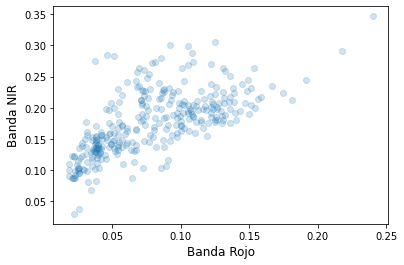

In [ ]:
# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt

# Acceso a una imagen Landsat.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Selección de las bandas Rojo y NIR, se escala y se muestran 500 puntos.
samp_fc = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Pasamos el muestro a una lista de listas.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Pinta un gráfico de tipo scatter plot con la relación de Red-NIR usando matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Banda Rojo', fontsize=12)
plt.ylabel('Banda NIR', fontsize=12)
plt.show()